In [4]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from skimage import io, transform
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
import os
category_dir = "animals/raw-img"
img_size = 100

print(os.listdir(category_dir))

['cow', 'elephant', 'cat', 'horse', 'chicken', 'squirrel', 'butterfly', 'sheep', 'dog', 'spider']


In [6]:
def get_data(folder_path):
    imgs = []
    indices = []
    labels = []
    for idx, folder_name in enumerate(os.listdir(folder_path)[:10]):
        if folder_name in ( "cat","dog") :
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(folder_path + '/' + folder_name)):
                if file_name.endswith('jpeg'):
                    img_file = io.imread(folder_path + '/' +  folder_name + '/' + file_name)
                    if img_file is not None:
                       img_file = transform.resize(img_file, (img_size, img_size))
                       imgs.append(np.asarray(img_file))
                       indices.append(idx)
    imgs = np.asarray(imgs)
    indices = np.asarray(indices).reshape(-1,1)
    labels = np.asarray(labels)
    return imgs, indices, labels
    
X, y, labels = get_data(category_dir)    

print('X shape:', X.shape)
print('y shape:', y.shape)
print("labels:",labels)

100%|██████████| 4908/4908 [01:33<00:00, 52.57it/s]


X shape: (6399, 100, 100, 3)
y shape: (6399, 1)
labels: ['cat' 'dog']


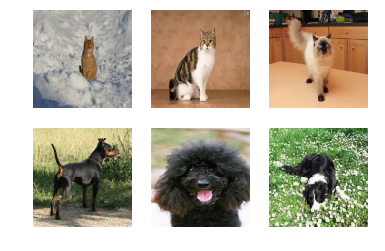

In [7]:
plt.subplot(2, 3, 1)
plt.imshow(X[1].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(X[2].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(X[3].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(X[1942].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(X[1943].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(X[1944].reshape(img_size, img_size,3))
plt.axis('off')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

x_train = X_train.reshape(number_of_train,  X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
x_test = X_test .reshape(number_of_test,  X_test.shape[1]*X_test.shape[2]* X_test.shape[3])
 
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5119, 30000)
x test:  (1280, 30000)
y train:  (5119, 1)
y test:  (1280, 1)


In [9]:
def build_classifier():  
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return classifier


classifier = KerasClassifier(build_fn = build_classifier, epochs = 100  )
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 2)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/100
 736/2559 [=======>......................] - ETA: 34s - loss: 0.6076 - acc: 0.7459 

/home/akhilesh/Junk/Scikit-basic/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.680837). Check your callbacks.
  % delta_t_median)


2559/2559 [==============================] - 14s 6ms/step - loss: 0.5611 - acc: 0.7710
Epoch 2/100
2559/2559 [==============================] - 1s 322us/step - loss: 0.5458 - acc: 0.7761
Epoch 3/100
2559/2559 [==============================] - 1s 204us/step - loss: 0.5390 - acc: 0.7761
Epoch 4/100
2559/2559 [==============================] - 1s 210us/step - loss: 0.5352 - acc: 0.7761
Epoch 5/100
2559/2559 [==============================] - 1s 210us/step - loss: 0.5318 - acc: 0.7761
Epoch 6/100
2559/2559 [==============================] - 1s 211us/step - loss: 0.5316 - acc: 0.7761
Epoch 7/100
2559/2559 [==============================] - 1s 209us/step - loss: 0.5214 - acc: 0.7761
Epoch 8/100
2559/2559 [==============================] - 1s 208us/step - loss: 0.5161 - acc: 0.7761
Epoch 9/100
2559/2559 [==============================] - 1s 205us/step - loss: 0.5096 - acc: 0.7761
Epoch 10/100
2559/2559 [==============================] - 1s 215us/step - loss: 0.5071 - acc: 0.7761
Epoch 11/100

2559/2559 [==============================] - 1s 206us/step - loss: 0.2987 - acc: 0.8585
Epoch 83/100
2559/2559 [==============================] - 1s 209us/step - loss: 0.2380 - acc: 0.9023
Epoch 84/100
2559/2559 [==============================] - 1s 207us/step - loss: 0.3279 - acc: 0.8320
Epoch 85/100
2559/2559 [==============================] - 1s 206us/step - loss: 0.3373 - acc: 0.8238
Epoch 86/100
2559/2559 [==============================] - 1s 205us/step - loss: 0.3585 - acc: 0.8066
Epoch 87/100
2559/2559 [==============================] - 1s 208us/step - loss: 0.2892 - acc: 0.8640
Epoch 88/100
2559/2559 [==============================] - 1s 209us/step - loss: 0.2478 - acc: 0.8972
Epoch 89/100
2559/2559 [==============================] - 1s 209us/step - loss: 0.2734 - acc: 0.8703
Epoch 90/100
2559/2559 [==============================] - 1s 205us/step - loss: 0.2852 - acc: 0.8656
Epoch 91/100
2559/2559 [==============================] - 1s 205us/step - loss: 0.2353 - acc: 0.8976
Epo

2560/2560 [==============================] - 1s 216us/step - loss: 0.3011 - acc: 0.8727
Epoch 63/100
2560/2560 [==============================] - 1s 211us/step - loss: 0.3254 - acc: 0.8543
Epoch 64/100
2560/2560 [==============================] - 1s 210us/step - loss: 0.2709 - acc: 0.8941
Epoch 65/100
2560/2560 [==============================] - 1s 209us/step - loss: 0.4025 - acc: 0.8195
Epoch 66/100
2560/2560 [==============================] - 1s 211us/step - loss: 0.3563 - acc: 0.8379
Epoch 67/100
2560/2560 [==============================] - 1s 210us/step - loss: 0.3370 - acc: 0.8531
Epoch 68/100
2560/2560 [==============================] - 1s 211us/step - loss: 0.3180 - acc: 0.8652
Epoch 69/100
2560/2560 [==============================] - 1s 210us/step - loss: 0.3039 - acc: 0.8773
Epoch 70/100
2560/2560 [==============================] - 1s 213us/step - loss: 0.2519 - acc: 0.9062
Epoch 71/100
2560/2560 [==============================] - 1s 211us/step - loss: 0.2640 - acc: 0.8883
Epo

In [10]:
predictions = cross_val_predict(estimator = classifier,  X = x_test, y = y_test ,  cv=2,verbose=0)
accuracy_pred = accuracy_score(predictions.astype(int), y_test.astype(int))

Epoch 1/100
640/640 [==============================] - 0s 580us/step - loss: 0.6187 - acc: 0.7297
Epoch 2/100
640/640 [==============================] - 0s 225us/step - loss: 0.5886 - acc: 0.7484
Epoch 3/100
640/640 [==============================] - 0s 219us/step - loss: 0.5796 - acc: 0.7484
Epoch 4/100
640/640 [==============================] - 0s 226us/step - loss: 0.5775 - acc: 0.7484
Epoch 5/100
640/640 [==============================] - 0s 225us/step - loss: 0.5753 - acc: 0.7484
Epoch 6/100
640/640 [==============================] - 0s 228us/step - loss: 0.5716 - acc: 0.7484
Epoch 7/100
640/640 [==============================] - 0s 228us/step - loss: 0.5694 - acc: 0.7484
Epoch 8/100
640/640 [==============================] - 0s 228us/step - loss: 0.5674 - acc: 0.7484
Epoch 9/100
640/640 [==============================] - 0s 236us/step - loss: 0.5621 - acc: 0.7484
Epoch 10/100
640/640 [==============================] - 0s 234us/step - loss: 0.5580 - acc: 0.7484
Epoch 11/100
640/64

640/640 [==============================] - 0s 229us/step - loss: 0.2419 - acc: 0.9109
Epoch 84/100
640/640 [==============================] - 0s 214us/step - loss: 0.1901 - acc: 0.9375
Epoch 85/100
640/640 [==============================] - 0s 211us/step - loss: 0.1740 - acc: 0.9469
Epoch 86/100
640/640 [==============================] - 0s 214us/step - loss: 0.1694 - acc: 0.9469
Epoch 87/100
640/640 [==============================] - 0s 213us/step - loss: 0.1758 - acc: 0.9438
Epoch 88/100
640/640 [==============================] - 0s 209us/step - loss: 0.2667 - acc: 0.8938
Epoch 89/100
640/640 [==============================] - 0s 213us/step - loss: 0.2516 - acc: 0.9047
Epoch 90/100
640/640 [==============================] - 0s 212us/step - loss: 0.2353 - acc: 0.9156
Epoch 91/100
640/640 [==============================] - 0s 213us/step - loss: 0.2017 - acc: 0.9328
Epoch 92/100
640/640 [==============================] - 0s 213us/step - loss: 0.2328 - acc: 0.9172
Epoch 93/100
640/640 [=

Epoch 66/100
640/640 [==============================] - 0s 221us/step - loss: 0.0974 - acc: 0.9656
Epoch 67/100
640/640 [==============================] - 0s 210us/step - loss: 0.1080 - acc: 0.9656
Epoch 68/100
640/640 [==============================] - 0s 214us/step - loss: 0.1131 - acc: 0.9516
Epoch 69/100
640/640 [==============================] - 0s 218us/step - loss: 0.1363 - acc: 0.9563
Epoch 70/100
640/640 [==============================] - 0s 211us/step - loss: 0.0924 - acc: 0.9781
Epoch 71/100
640/640 [==============================] - 0s 225us/step - loss: 0.0693 - acc: 0.9828
Epoch 72/100
640/640 [==============================] - 0s 216us/step - loss: 0.0666 - acc: 0.9891
Epoch 73/100
640/640 [==============================] - 0s 213us/step - loss: 0.0633 - acc: 0.9859
Epoch 74/100
640/640 [==============================] - 0s 222us/step - loss: 0.0499 - acc: 0.9953
Epoch 75/100
640/640 [==============================] - 0s 212us/step - loss: 0.0493 - acc: 0.9906
Epoch 76/1

In [11]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))
print("Predictions Accuracy: " ,accuracy_pred)



Accuracy mean: 0.7134196250105147
Accuracy variance: 0.004939749989485376
Predictions Accuracy:  0.62734375
